<a href="https://colab.research.google.com/github/sabrinamarrocos/analise-airbnb/blob/main/analise_airbnb_ny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_airbnb_inside = pd.read_csv("/content/listings.csv.gz", compression="gzip")
df_answer_the_public = pd.read_csv("/content/airbnb-en-us-suggestions-18-09-2025.csv")
df_google_trends2025 = pd.read_csv("/content/multiTimeline_limpo.csv")

In [3]:
df_google_trends2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Semana                39 non-null     object
 1   airbnb (New York NY)  39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [4]:
df_google_trends2025 = df_google_trends2025[pd.to_numeric(df_google_trends2025['airbnb (New York NY)'], errors='coerce').notnull()]
df_google_trends2025['airbnb (New York NY)'] = df_google_trends2025['airbnb (New York NY)'].astype(int)

In [5]:
df_google_trends2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 38
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Semana                38 non-null     object
 1   airbnb (New York NY)  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


In [6]:
df_google_trends2025.columns = ["Semana", "Pesquisas"]

In [7]:
soma_google = df_google_trends2025["Pesquisas"].sum()
media_google = df_google_trends2025["Pesquisas"].mean()
maximo_google = df_google_trends2025["Pesquisas"].max()
minimo_google = df_google_trends2025["Pesquisas"].min()
print(f"A soma de pessoas que pesquisaram sobre 'Airbnb' no Google em 2025, até o momento, é de {soma_google} pessoas, sendo a média de {media_google:.2f} pessoas")
print(f"A maior quantidade de pesquisas sobre 'Airbnb' no Google em 2025, até o momento é de {maximo_google} e o mínimo {minimo_google}")

A soma de pessoas que pesquisaram sobre 'Airbnb' no Google em 2025, até o momento, é de 2746 pessoas, sendo a média de 72.26 pessoas
A maior quantidade de pesquisas sobre 'Airbnb' no Google em 2025, até o momento é de 100 e o mínimo 58


In [8]:
melhores_semanas = df_google_trends2025['Pesquisas'] > 80

In [9]:
df_google_trends2025[melhores_semanas]

,Semana,Pesquisas
25,2025-06-15,83
26,2025-06-22,83
27,2025-06-29,82
28,2025-07-06,81
29,2025-07-13,84
30,2025-07-20,100
31,2025-07-27,85
33,2025-08-10,83


In [10]:
max_semana = df_google_trends2025['Pesquisas'] == 100

In [30]:
df_filtrado_semanas = df_google_trends2025[melhores_semanas]

In [20]:
import matplotlib.pyplot as plt

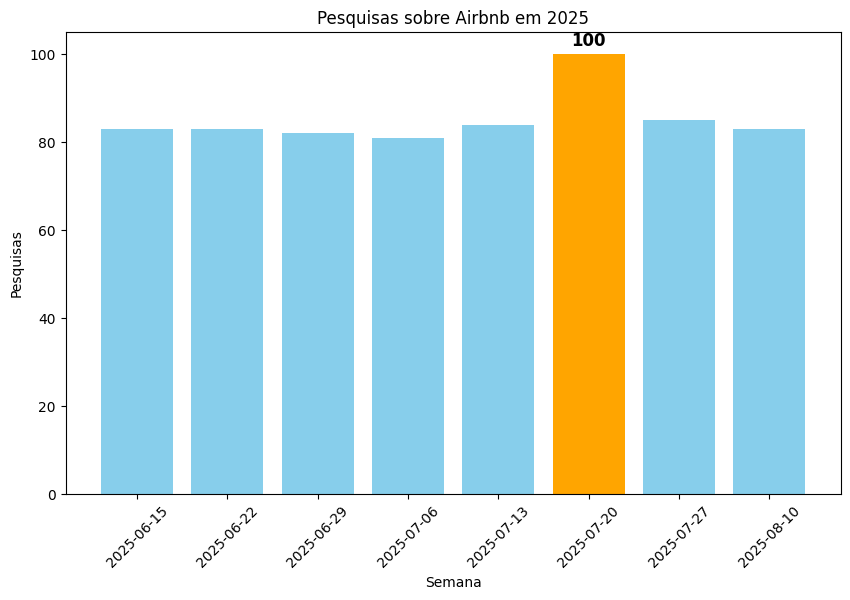

In [34]:
import matplotlib.pyplot as plt

max_idx = df_filtrado_semanas['Pesquisas'].idxmax()
cores = ['skyblue' if i != max_idx else 'orange' for i in df_filtrado_semanas.index]

plt.figure(figsize=(10, 6))
plt.bar(df_filtrado_semanas['Semana'], df_filtrado_semanas['Pesquisas'], color=cores)
plt.xticks(rotation=45)
plt.xlabel('Semana')
plt.ylabel('Pesquisas')
plt.title('Pesquisas sobre Airbnb em 2025')

valor_max = df_filtrado_semanas.loc[max_idx, 'Pesquisas']
semana_max = df_filtrado_semanas.loc[max_idx, 'Semana']
plt.text(semana_max, valor_max + 1, str(valor_max), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()
